In [1]:
import matplotlib.pyplot as plt
import neuropacks as packs
import numpy as np
import mpl_lego as mplego
import os

from noise_correlations import analysis, utils
from mpl_lego.colors import hex_to_rgb
from mpl_lego.ellipse import plot_cov_ellipse

%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [3]:
ccycle = mplego.colors.get_default_ccycle()

In [4]:
base_path = '/storage/data'

In [5]:
# PVC11 paths
pvc11_1_path = os.path.join(base_path, 'pvc11/data/spikes_gratings/data_monkey1_gratings.mat')
pvc11_2_path = os.path.join(base_path, 'pvc11/data/spikes_gratings/data_monkey2_gratings.mat')
pvc11_3_path = os.path.join(base_path, 'pvc11/data/spikes_gratings/data_monkey3_gratings.mat')
# Create neuropacks
pvc11_1 = packs.PVC11(data_path=pvc11_1_path)
pvc11_2 = packs.PVC11(data_path=pvc11_2_path)
pvc11_3 = packs.PVC11(data_path=pvc11_3_path)
# Load response matrices
X_pvc11_1 = pvc11_1.get_response_matrix(transform=None)
X_pvc11_2 = pvc11_2.get_response_matrix(transform=None)
X_pvc11_3 = pvc11_3.get_response_matrix(transform=None)
# Extract stimuli
stimuli_pvc11 = pvc11_1.get_design_matrix(form='angle')

In [6]:
# RET2 path
ret2_path = os.path.join(base_path, 'ret2/200114_fov1_data.mat')
# Create neuropack
ret2 = packs.RET2(data_path=ret2_path)
# Load response matrix
X_ret2 = ret2.get_response_matrix(cells='tuned', response='max')
# Extract stimuli
stimuli_ret2 = ret2.angles
unique_stimuli_ret2 = ret2.unique_angles

In [7]:
# RET2 path
ecog_path = os.path.join(base_path, 'ecog/r32_b7.mat')
# Create neuropack
ecog = packs.ECOG(data_path=ecog_path)
# Load response matrix
X_ecog = ecog.get_response_matrix(
    bounds=[40, 60],
    band='HG',
    electrodes=ecog.pac_idxs)
# Extract stimuli
stimuli_ecog = ecog.get_design_matrix('frequency')
unique_stimuli_ecog = np.unique(stimuli_ecog)

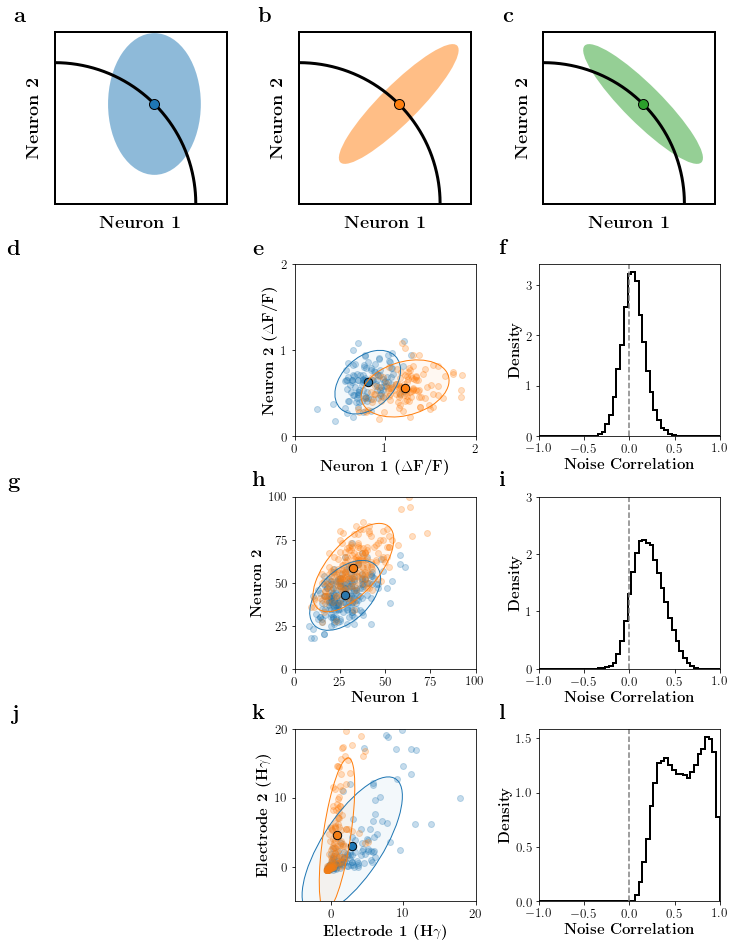

In [13]:
# Figure parameters
n_datasets = 3
n_rows = n_datasets + 1
n_cols = 3
# Style settings
n_std = 0.6 # N. std for cov ellipses
cov_alpha = 0.5 # Opacity for cov ellipses
s_cov = 100 # Mean cov. scatter size
data_alpha = 0.25 # Opacity for data points
data_std = 2. # N. std for data ellipses
ax_label_size = 15
ax_top_label_size = 18
ax_tick_size = 13
hist_linewidth = 2
mu_scatter_size = 70
subplot_x = -0.20
subplot_y = 1.09
subplot_label_size = 22

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
plt.subplots_adjust(wspace=0.35, hspace=0.35)
# Leftmost plot (after first row): brain image, clear out space
for ax in axes[1:, 0]:
    ax.axis(False)
# Axis indices
var_idx = 0
ret_idx = 1
pvc_idx = 2
ecog_idx = 3

"""
Top row: components of variability
"""
var_axes = axes[var_idx]
# Mean response curves
n1 = np.linspace(0, 1, 1000)
n2 = np.sqrt(1 - n1**2)
center = 1 / np.sqrt([2, 2])

# Plot mean response curves
for ax in var_axes:
    ax.plot(n1, n2, color='black', linewidth=3)
    
# Create private variability covariance
privax = var_axes[0]
private = np.array([[0.3, 0.],
                    [0., 0.7]])
# Plot private variance ellipse
plot_cov_ellipse(
    private,
    mu=center,
    ax=privax,
    facecolor=hex_to_rgb(ccycle[0], cov_alpha),
    n_std=n_std,
    include_mu=False)
# Plot center of ellipse (mean response)
privax.scatter(
    center[0],
    center[1],
    color=ccycle[0],
    edgecolor='black',
    s=s_cov,
    zorder=1000)

# Create shared variability covariance
shareax = var_axes[1]
shared = np.array([[0.5, 0.45],
                   [0.45, 0.5]])
# Plot shared variability ellipse
plot_cov_ellipse(
    shared,
    mu=center,
    ax=shareax,
    facecolor=hex_to_rgb(ccycle[1], cov_alpha),
    n_std=n_std,
    include_mu=False)
# Plot center of ellipse (mean response)
shareax.scatter(
    center[0],
    center[1],
    color=ccycle[1],
    edgecolor='black',
    s=s_cov,
    zorder=1000)

# Create differential correlations covariance
diffax = var_axes[2]
diff = np.array([[0.5, -0.45],
                 [-0.45, 0.5]])
# Plot differential correlation ellipse
plot_cov_ellipse(
    diff,
    mu=center,
    ax=diffax,
    facecolor=hex_to_rgb(ccycle[2], cov_alpha),
    n_std=n_std,
    include_mu=False)
diffax.scatter(
    center[0],
    center[1],
    color=ccycle[2],
    edgecolor='black',
    s=s_cov,
    zorder=1000)

for ax in var_axes.ravel():
    ax.set_xlim([0, 1.22])
    ax.set_ylim([0, 1.22])
    # Set spine thickness of axes
    for spine in ax.spines:
        ax.spines[spine].set_linewidth(2)
    # Axes labels
    ax.set_xlabel(r'\textbf{Neuron 1}', fontsize=ax_top_label_size, labelpad=12)
    ax.set_ylabel(r'\textbf{Neuron 2}', fontsize=ax_top_label_size, labelpad=12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

"""
RET2 Dataset
"""
# RET2, Column 1: Example responses
ret_ex_ax = axes[ret_idx, 1]

units = [32, 25]
stims = [0, 60]
X1, X2 = utils.get_dimstim_responses(X_ret2, stimuli_ret2, units, stims)
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)

ret_ex_ax.scatter(
    X1[:, 0],
    X1[:, 1],
    color=ccycle[0],
    alpha=data_alpha)
plot_cov_ellipse(
    np.cov(X1, rowvar=False),
    mu=mu1,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[0], 0.05),
    edgecolor=hex_to_rgb(ccycle[0], 1.0),
    ax=ret_ex_ax)
plot_cov_ellipse(
    np.cov(X2, rowvar=False),
    mu=mu2,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[1], 0.05),
    edgecolor=hex_to_rgb(ccycle[1], 1.0),
    ax=ret_ex_ax)
ret_ex_ax.scatter(
    X2[:, 0],
    X2[:, 1],
    color=ccycle[1],
    alpha=data_alpha)
ret_ex_ax.scatter(
    mu1[0], mu1[1],
    color=ccycle[0],
    s=mu_scatter_size,
    edgecolor='black')
ret_ex_ax.scatter(
    mu2[0], mu2[1],
    color=ccycle[1],
    s=mu_scatter_size,
    edgecolor='black')

ret_ex_ax.set_xlim([0., 2])
ret_ex_ax.set_ylim(ret_ex_ax.get_xlim())
ret_ex_ax.set_xticks([0., 1, 2.])
ret_ex_ax.set_yticks(ret_ex_ax.get_xticks())
ret_ex_ax.set_xlabel(r'\textbf{Neuron 1 ($\Delta$F/F)}', fontsize=ax_label_size)
ret_ex_ax.set_ylabel(r'\textbf{Neuron 2 ($\Delta$F/F)}', fontsize=ax_label_size)

# RET2, Column 3: Noise correlation distribution
ret_nc_ax = axes[ret_idx, 2]
nc_ret2 = analysis.all_correlations(X_ret2, stimuli_ret2)
bins = np.linspace(-1, 1, 50)
ret_nc_ax.hist(
    nc_ret2,
    bins=bins,
    density=True,
    color='black',
    histtype='step',
    linewidth=hist_linewidth)
ret_nc_ax.axvline(0, linestyle='--', color='grey')

ret_nc_ax.set_xlim([-1, 1])
ret_nc_ax.set_xlabel(r'\textbf{Noise Correlation}', fontsize=ax_label_size)
ret_nc_ax.set_ylabel(r'\textbf{Density}', fontsize=ax_label_size)

"""
PVC11 Dataset
"""
# PVC11, Column 1: Example responses of two neurons
pvc_ex_ax = axes[pvc_idx, 1]

stims = [0, 30]
units = [57, 34]
X1, X2 = utils.get_dimstim_responses(X_pvc11_1, stimuli_pvc11, units, stims)
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)

pvc_ex_ax = plot_cov_ellipse(
    np.cov(X1, rowvar=False),
    mu=mu1,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[0], 0.05),
    edgecolor=hex_to_rgb(ccycle[0], 1.0),
    ax=pvc_ex_ax)
pvc_ex_ax = plot_cov_ellipse(
    np.cov(X2, rowvar=False),
    mu=mu2,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[1], 0.05),
    edgecolor=hex_to_rgb(ccycle[1], 1.0),
    ax=pvc_ex_ax)
pvc_ex_ax.scatter(
    X1[:, 0],
    X1[:, 1],
    color=ccycle[0],
    alpha=data_alpha)
pvc_ex_ax.scatter(
    X2[:, 0],
    X2[:, 1],
    color=ccycle[1],
    alpha=data_alpha)
pvc_ex_ax.scatter(
    mu1[0], mu1[1],
    color=ccycle[0],
    s=mu_scatter_size,
    edgecolor='black')
pvc_ex_ax.scatter(
    mu2[0], mu2[1],
    color=ccycle[1],
    s=mu_scatter_size,
    edgecolor='black')

pvc_ex_ax.set_xlim([0., 100])
pvc_ex_ax.set_ylim([0, 100])
pvc_ex_ax.set_xticks([0, 25, 50, 75, 100])
pvc_ex_ax.set_yticks(pvc_ex_ax.get_xticks())
pvc_ex_ax.set_xlabel(r'\textbf{Neuron 1}', fontsize=ax_label_size)
pvc_ex_ax.set_ylabel(r'\textbf{Neuron 2}', fontsize=ax_label_size)

# PVC11, Column 3: Distribution of noise correlations
pvc11_nc_ax = axes[pvc_idx, 2]
# Calculate distribution of noise correlations
nc_pvc11_1 = analysis.all_correlations(X_pvc11_1, stimuli_pvc11)
nc_pvc11_2 = analysis.all_correlations(X_pvc11_2, stimuli_pvc11)
nc_pvc11_3 = analysis.all_correlations(X_pvc11_3, stimuli_pvc11)
# Plot distributions as density histograms
bins = np.linspace(-1, 1, 50)
pvc11_nc_ax.hist(
    nc_pvc11_3,
    bins=bins,
    density=True,
    color='black',
    histtype='step',
    linewidth=hist_linewidth)
pvc11_nc_ax.axvline(0, linestyle='--', color='grey')

pvc11_nc_ax.set_xlim([-1, 1])
pvc11_nc_ax.set_yticks([0, 1, 2, 3])
pvc11_nc_ax.set_xlabel(r'\textbf{Noise Correlation}', fontsize=ax_label_size)
pvc11_nc_ax.set_ylabel(r'\textbf{Density}', fontsize=ax_label_size)

"""
ECOG Dataset
"""
# ECOG, Column 2: Example responses
ecog_ex_ax = axes[ecog_idx, 1]

units = [13, 37]
stims = [1024, 2795]
X1, X2 = utils.get_dimstim_responses(X_ecog, stimuli_ecog, units, stims)
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)

ecog_ex_ax.scatter(
    X1[:, 0],
    X1[:, 1],
    color=ccycle[0],
    alpha=data_alpha)
plot_cov_ellipse(
    np.cov(X1, rowvar=False),
    mu=mu1,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[0], 0.05),
    edgecolor=hex_to_rgb(ccycle[0], 1.0),
    ax=ecog_ex_ax)
plot_cov_ellipse(
    np.cov(X2, rowvar=False),
    mu=mu2,
    n_std=data_std,
    facecolor=hex_to_rgb(ccycle[1], 0.05),
    edgecolor=hex_to_rgb(ccycle[1], 1.0),
    ax=ecog_ex_ax)
ecog_ex_ax.scatter(
    X2[:, 0],
    X2[:, 1],
    color=ccycle[1],
    alpha=data_alpha)
ecog_ex_ax.scatter(
    mu1[0], mu1[1],
    color=ccycle[0],
    s=mu_scatter_size,
    edgecolor='black')
ecog_ex_ax.scatter(
    mu2[0], mu2[1],
    color=ccycle[1],
    s=mu_scatter_size,
    edgecolor='black')

ecog_ex_ax.set_xlim(-5, 20)
ecog_ex_ax.set_ylim(ecog_ex_ax.get_xlim())
ecog_ex_ax.set_xticks([0, 10, 20])
ecog_ex_ax.set_yticks(ecog_ex_ax.get_xticks())
ecog_ex_ax.set_xlabel(r'\textbf{Electrode 1 (H$\gamma$)}', fontsize=ax_label_size)
ecog_ex_ax.set_ylabel(r'\textbf{Electrode 2 (H$\gamma$)}', fontsize=ax_label_size)

# ECOG, Column 3: Noise correlation distribution
ecog_nc_ax = axes[ecog_idx, 2]
nc_ecog = analysis.all_correlations(X_ecog, stimuli_ecog)
bins = np.linspace(-1, 1, 50)
ecog_nc_ax.hist(
    nc_ecog,
    bins=bins,
    density=True,
    color='black',
    histtype='step',
    linewidth=hist_linewidth)
ecog_nc_ax.axvline(0, linestyle='--', color='grey')

ecog_nc_ax.set_xlim([-1, 1])
ecog_nc_ax.set_xlabel(r'\textbf{Noise Correlation}', fontsize=ax_label_size)
ecog_nc_ax.set_ylabel(r'\textbf{Density}', fontsize=ax_label_size)

"""
Global Settings
"""
# Set axis tick label size
for ax in axes.ravel():
    ax.tick_params(labelsize=ax_tick_size)
# Apply subplot labels
mplego.labels.apply_subplot_labels(
    axes.ravel(),
    bold=True,
    x=subplot_x,
    y=subplot_y,
    size=subplot_label_size)

plt.savefig('figure1.pdf', bbox_inches='tight')
plt.show()